# 스웬센-왕 알고리즘

격자 형태의 스핀 모델에서의 몬테카를로 기법을 사용하여 마코프 체인 몬테카를로 방법을 구현한 알고리즘


## 알고리즘 원리

- 몬테카를로 샘플링:
    - 격자 형태의 스핀 모델에서 특정 스핀이 다른 스핀과 상호 작용하는 에너지를 계산한다.
- 확률적 클러스터 형성:
    - 각 스핀이 주어진 온도(베타 값에 비례)에서 뒤집히는 확률을 계산한다.
    - 이 확률에 따라 서로 연결된 스핀들이 하나의 클러스터를 형성한다.
    - 이 과정은 확률적으로 이루어지므로, 전역적인 국부 평형 상태를 즉시 달성한다.
- 클러스터 레이블링:
    - 형성된 클러스터를 식별하고, 각 클러스터의 크기를 기록한다.
    - Union-Find 자료구조를 사용하여 클러스터 레이블을 관리한다.
- 스핀 업데이트:
    - 각 클러스터에 속한 스핀들을 동시에 뒤집어 새로운 상태를 생성한다.
    - 이 과정은 특히 큰 클러스터에서의 병렬성을 제공하며, 전역적인 상태 공간을 빠르게 탐색할 수 있다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def union(r1, r2) :
    if r2 != r1:
        if ptr[r1] > ptr[r2]:
            ptr[r2] += ptr[r1]
            ptr[r1] = r2
            r1 = r2
        else:
            ptr[r1] += ptr[r2]
            ptr[r2] = r1
    return r1, r2

def find(i):
    if ptr[i] < 0:
        return i
    else:
        ptr[i] = find(ptr[i])
        return ptr[i]

def bond(L) :
    bonds = []
    for i in range(L):
        for j in range(L):
            index = i * L + j
            if j < L - 1:
                bonds.append((index, index + 1))
            else :
                bonds.append((index, index - L + 1))
            if i < L - 1:
                bonds.append((index, index + L))
            else :
                bonds.append((index, index - L * (L - 1)))
    return bonds

def P(beta) :
    return 1 - np.exp(-2 * beta)


In [5]:
def Swendsen_Wang(L, beta) :
    L, beta = L, beta
    N = L ** 2

    ptr = np.random.choice([-1, 1], size = (L * L))
    size = np.ones(L ** 2 , dtype = int) * -1

    # print(ptr.reshape(L,L))
    p = P(beta)

    bonds = bond(L)
    # print("bonds", bonds)

    for i in range(len(bonds)):
        s1, s2 = bonds[i][0], bonds[i][1]
        if size[s1] * size[s2] > 0 :
            if np.random.rand() < p :
                r1 = find(s1)
                r2 = find(s2)
                r1,r2 = union(r1,r2)
    # print(ptr.reshape(L,L))

    clusters = set()

    for i in range(N):
        r1 = find(i)
        clusters.add(r1)

    for cluster in clusters:
        if np.random.random() < 0.5:
            for i in range(N):
                if find(i) == cluster:
                    size[i] *= -1

    S_avg = abs(np.sum(size)) / N
    # print("-----------")
    return S_avg


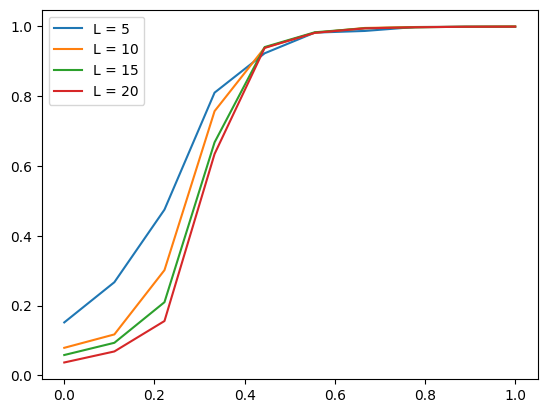

In [6]:
trial = 100
beta = np.linspace(0.0, 1, 10)

L = 5
L_5_M_list = []
for temp_beta in beta :
    temp_M_by_beta = 0
    for j in range(trial) :
        ptr = np.ones(L ** 2, int) * -1 #스핀 초기화
        temp_S_avg = Swendsen_Wang(L, temp_beta)
        temp_M_by_beta += temp_S_avg
    temp_M = temp_M_by_beta / trial
    L_5_M_list.append(temp_M)

L = 10
L_10_M_list = []
for temp_beta in beta :
    temp_M_by_beta = 0
    for j in range(trial) :
        ptr = np.ones(L ** 2, int) * -1 #스핀 초기화
        temp_S_avg = Swendsen_Wang(L, temp_beta)
        temp_M_by_beta += temp_S_avg
    temp_M = temp_M_by_beta / trial
    L_10_M_list.append(temp_M)

L = 15
L_15_M_list = []
for temp_beta in beta :
    temp_M_by_beta = 0
    for j in range(trial) :
        ptr = np.ones(L ** 2, int) * -1 #스핀 초기화
        temp_S_avg = Swendsen_Wang(L, temp_beta)
        temp_M_by_beta += temp_S_avg
    temp_M = temp_M_by_beta / trial
    L_15_M_list.append(temp_M)

L = 20
L_20_M_list = []
for temp_beta in beta :
    temp_M_by_beta = 0
    for j in range(trial) :
        ptr = np.ones(L ** 2, int) * -1 #스핀 초기화
        temp_S_avg = Swendsen_Wang(L, temp_beta)
        temp_M_by_beta += temp_S_avg
    temp_M = temp_M_by_beta / trial
    L_20_M_list.append(temp_M)

plt.plot(beta, L_5_M_list, label = 'L = 5')
plt.plot(beta, L_10_M_list, label = 'L = 10')
plt.plot(beta, L_15_M_list, label = 'L = 15')
plt.plot(beta, L_20_M_list, label = 'L = 20')
plt.legend()
plt.show()